## Loading Data

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf

### Spacy Embeddings

In [4]:
ekg_denoised = pd.read_pickle('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_spacy.pkl')
ekg_denoised = ekg_denoised.sample(frac=1)


In [5]:
ekg_denoised.head()

,ICD9_CODE,spacy_embeddings
696,0,"[-0.07936183, 0.27024016, -0.15811957, -0.0519..."
3404,2,"[-0.11360335, 0.19411947, -0.20573227, -0.0379..."
2285,1,"[-0.09637926, 0.1485467, -0.123320304, -0.0160..."
2055,1,"[-0.07524645, 0.31128493, -0.2364742, 0.069527..."
5752,3,"[-0.08324135, 0.2770619, -0.20336129, 0.001105..."


In [6]:
ekg_denoised['spacy_embeddings'][4603].shape

(300,)

### Train/Dev/Test/Split

In [8]:
X = ekg_denoised['spacy_embeddings']
y = ekg_denoised['ICD9_CODE']

In [9]:
train_X, validate_X, test_X = np.split(X.sample(frac=1), 
                                       [int(.6*len(X)), 
                                        int(.8*len(X))])

train_y, validate_y, test_y = np.split(y.sample(frac=1), 
                                       [int(.6*len(y)), 
                                        int(.8*len(y))])

In [10]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [11]:
new_train_X = []
for i in train_X:
    new_train_X.append(list(i))
train_X = np.array(new_train_X)
    
new_validate_X = []
for i in validate_X:
    new_validate_X.append(list(i))
validate_X = np.array(new_validate_X)
    
new_test_X = []
for i in test_X:
    new_test_X.append(list(i))
test_X = np.array(new_test_X)

## Define Keras Model

In [22]:
small_train_X = train_X[50:]
small_train_y = train_y[50:]

In [25]:
inputs = tf.keras.layers.Input(shape=(300,))
hidden_1_out = tf.keras.layers.Dense(150, activation='relu')(inputs)
classification_out = tf.keras.layers.Dense(4, activation='relu')(hidden_1_out)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

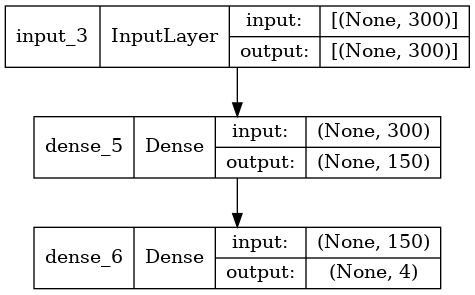

In [26]:
tf.keras.utils.plot_model(model_functional, "my_first_model_with_shape_info.png", show_shapes=True)


In [27]:
model_functional.fit(small_train_X, small_train_y, epochs=15, batch_size=100)


Epoch 1/15
39/39 [==============================] - 0s 2ms/step - loss: 5.1085 - accuracy: 0.2524
Epoch 2/15
39/39 [==============================] - 0s 2ms/step - loss: 4.7639 - accuracy: 0.2586
Epoch 3/15
39/39 [==============================] - 0s 2ms/step - loss: 4.7877 - accuracy: 0.2516
Epoch 4/15
39/39 [==============================] - 0s 2ms/step - loss: 4.6630 - accuracy: 0.2604
Epoch 5/15
39/39 [==============================] - 0s 2ms/step - loss: 4.8301 - accuracy: 0.2578
Epoch 6/15
39/39 [==============================] - 0s 2ms/step - loss: 4.6844 - accuracy: 0.2643
Epoch 7/15
39/39 [==============================] - 0s 2ms/step - loss: 4.8891 - accuracy: 0.2619
Epoch 8/15
39/39 [==============================] - 0s 2ms/step - loss: 4.8025 - accuracy: 0.2601
Epoch 9/15
39/39 [==============================] - 0s 2ms/step - loss: 4.9196 - accuracy: 0.2555
Epoch 10/15
39/39 [==============================] - 0s 2ms/step - loss: 4.8482 - accuracy: 0.2599
Epoch 11/15
39/39 [

In [13]:
model_functional.evaluate(test_X, test_y)

41/41 [==============================] - 0s 1ms/step - loss: 1.3863 - accuracy: 0.2408


[1.3862950801849365, 0.24082568287849426]

#Subset to just 10 or 50 clear examples - If loss is the same, the the issue is probably with the data (how it's vectorized + fed into the model)
